<a href="https://colab.research.google.com/github/maimonahST/GP/blob/main/Final%20Version/ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pip

In [ ]:
! pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 10.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [ ]:
from glob import glob
import mne
import numpy as np
from scipy import stats
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler


def process_data(file_path):
    raw = mne.io.read_raw_bdf(file_path, preload=True)

    # Apply ICA to remove artifacts
    ica = mne.preprocessing.ICA(n_components=32, random_state=42)
    raw.resample(250)
    raw.filter(5, 25)
    ica.fit(raw)
    # cleaned_data = ica.apply(raw)

    # # Create epochs from the cleaned data
    # events = mne.make_fixed_length_events(cleaned_data, duration=5)
    # epochs = mne.Epochs(cleaned_data, events, tmin=0, tmax=5, baseline=None, detrend=1, preload=True)

    # Extract features (you may need to customize this step based on your specific needs)
    features = ica.get_components()

    return features

def read_data(filepaths, label):
    epochs_array = []
    epochs_label = []


    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):

        array = process_data(file_path)
        epochs_array.append(array)
        epochs_label.append(label*len(array))


    return epochs_array, epochs_label


# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP/GP-Data/Subjects/*.bdf')

# Process data in chunks
haemorrhage_epochs_array, haemorrhage_epochs_label = read_data(haemorrhage_filepaths, label=0)
ischaemia_epochs_array, ischaemia_epochs_label = read_data(ischaemia_filepaths, label=1)
subject_epochs_array, subject_epochs_label = read_data(subject_filepaths, label=2)


Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P2_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12238847  =      0.000 ...   747.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22491 events found on stim channel Status
Event IDs: [65284 65288 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329 65336]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2889 events found on stim channel Status
Event IDs: [65296 65297 65305 65312 65313 65328 65329]
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 152 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 23.2s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 31.0s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 150 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 26.0s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P10_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2752 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
146 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 146 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 20.8s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 17.5s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P14_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311 65312 65313 65328
 65329]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2787 events found on stim channel Status
Event IDs: [65281 65296 65297 65312 65313 65328 65329]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 16.8s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 26.9s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Not setting metadata
151 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 151 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 28.3s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 28.7s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 26.3s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
147 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 147 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 23.1s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 0 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
217 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 217 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 30.9s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 19.0s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 18.0s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 20.3s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Not setting metadata
163 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 163 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 31.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Not setting metadata
146 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 146 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 20.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
146 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 146 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 18.7s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 23.7s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 28.2s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 23.8s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 18.8s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 16.9s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Not setting metadata
146 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 146 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 20.1s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 23.4s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 1 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 152 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 16.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
149 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 149 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 20.5s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 25.4s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Not setting metadata
158 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 158 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 40.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 15.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 17.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 20.3s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Not setting metadata
146 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 146 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 27.3s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Not setting metadata
146 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 146 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 22.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 27.1s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 27.6s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 23.5s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 26.1s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 22.0s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 16.1s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Not setting metadata
148 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 148 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 19.2s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Not setting metadata
154 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 154 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 21.4s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 15.1s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Not setting metadata
159 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 159 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 33.4s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]


<ipython-input-25-ceac70ad00ab>:16: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(custom_montage)


Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1251 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-25-ceac70ad00ab>:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Selecting by number: 32 components
Fitting ICA took 31.2s.
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


<ipython-input-25-ceac70ad00ab>:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  features = ica.apply(epochs.copy()).get_data()
Processing 2 data: 100%|██████████| 1/1 [01:16<00:00, 76.82s/it]


In [ ]:
# Combine epoch arrays for different classes into a single list
data_list = haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array
label_list = haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label


In [ ]:
# Stack the data, labels, and groups into numpy arrays
data_array =  np.array(data_list)
label_array = np.hstack(label_list)

# Move the axis to make the data suitable for input into a deep learning model
data_array = np.swapaxes(data_array, 1, 2)

# Print the shapes of the resulting arrays
print(data_array.shape, label_array.shape)

(45, 32, 32) (45,)


In [ ]:
# save scaled data
np.save('/content/drive/MyDrive/GP/GP-Data/X_ica2.npy', data_array)
np.save('/content/drive/MyDrive/GP/GP-Data/y_ica2.npy', label_array)

# Models Training



## Define Functions/Classes

In [117]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf=GroupKFold()
# This function to standerd scale 3D data
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)



def three_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      train_features, train_label = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      train_features=scaler.fit_transform(train_features)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  # Split train_features into train and val
  for train_index, val_index in gkf.split(train_features, train_label, groups= train_groups):
      X_train, y_train =train_features[train_index],train_label[train_index]
      X_val, y_val =train_features[val_index],train_label[val_index]

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[val_index])}")

      break

  return X_train, X_val, X_test, y_train, y_val, y_test




def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test, train_groups


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



def fit_and_evaluate(X_train, y_train, X_test, y_test,model):

  model.fit(X_train, y_train)

  # Predictions on the test set
  y_pred = model.predict(X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')


  # Print the results
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1-score:", f1)


  print("Classification Report (Test):\n", classification_report(y_test, y_pred))

  # Compute the confusion matrix for the test set
  cm_test = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix for the test set
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix for Decision Tree {model.__class__}")
  plt.show()

  return model




def evaluate(model, X_test, y_test):

  # Predictions on the test set
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5).astype(int)

  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')


  # Print the results
  print("Accuracy:", accuracy)
  print("Recall:", recall)
  print("Precision:", precision)
  print("F1-score:", f1)


  print("Classification Report (Test):\n", classification_report(y_test, y_pred))

  # Compute the confusion matrix for the test set
  cm_test = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix for the test set
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix for Decision Tree {model.__class__}")
  plt.show()

  return



def plot_history(hist):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

## Prepare the data

In [119]:
from sklearn.model_selection import train_test_split
import numpy as np


# Step 1: Load the data
X = np.load('/content/drive/MyDrive/GP/GP-Data/X_ica2.npy')
y = np.load('/content/drive/MyDrive/GP/GP-Data/y_ica2.npy')

y = y.astype('int')

print(X.shape, y.shape)

# Step 2: Convert multicalss to binary
y[y==0] = 1 #Stroke
y[y==2] = 0 #Healthy


# Step 3: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# Step 4: normalize the data using standerd scale
# scaler  = StandardScaler3D()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)


(45, 32, 32) (45,)


## ML Models


In [120]:
# Flatten the data array for ML models
X_train_ml = X_train.reshape(X_train.shape[0], -1)
X_test_ml = X_test.reshape(X_test.shape[0], -1)


y_train_ml = y_train.reshape(y_train.shape[0], -1)
y_test_ml = y_test.reshape(y_test.shape[0], -1)


X_train_ml.shape, X_test_ml.shape, y_train_ml.shape, y_test_ml.shape

((36, 1024), (9, 1024), (36, 1), (9, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.6666666666666666
Recall: 0.6666666666666666
Precision: 0.6428571428571428
F1-score: 0.6461538461538461
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.71      0.83      0.77         6

    accuracy                           0.67         9
   macro avg       0.61      0.58      0.58         9
weighted avg       0.64      0.67      0.65         9



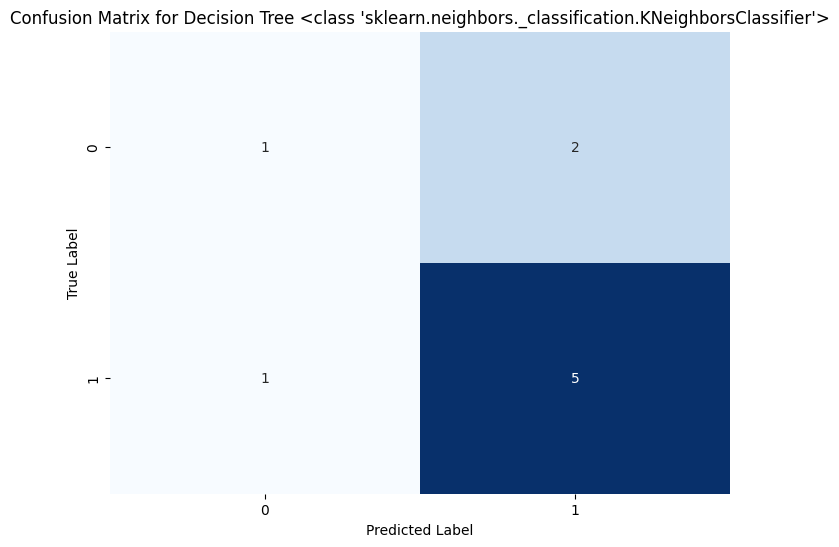

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml , y_test_ml,
                       KNeighborsClassifier(algorithm='auto', n_neighbors = 5, weights='uniform'))


<ipython-input-9-20cbfc4e131b>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.8333333333333334
F1-score: 0.738095238095238
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         6

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9



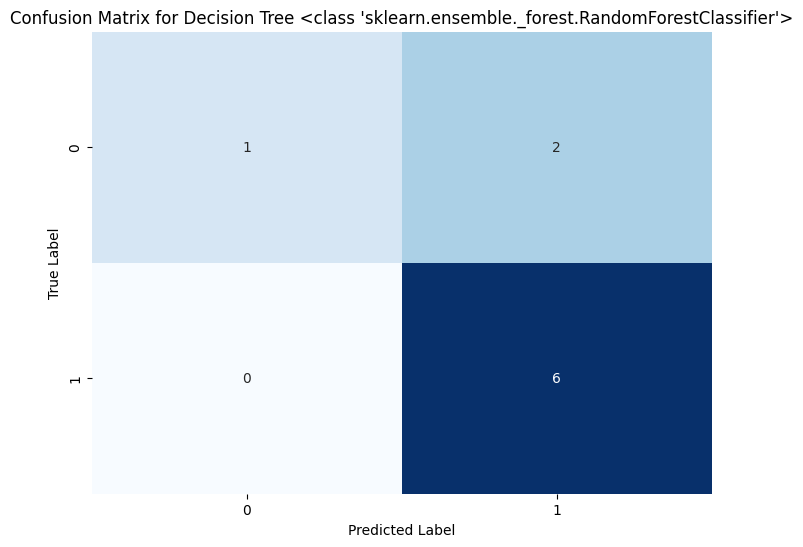

In [ ]:
# RF

from sklearn.ensemble import RandomForestClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml,X_test_ml , y_test_ml,
                       RandomForestClassifier(n_estimators=200, max_depth=9, max_leaf_nodes = 6))

Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.8666666666666667
F1-score: 0.7833333333333334
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.67      0.80         6

    accuracy                           0.78         9
   macro avg       0.80      0.83      0.77         9
weighted avg       0.87      0.78      0.78         9



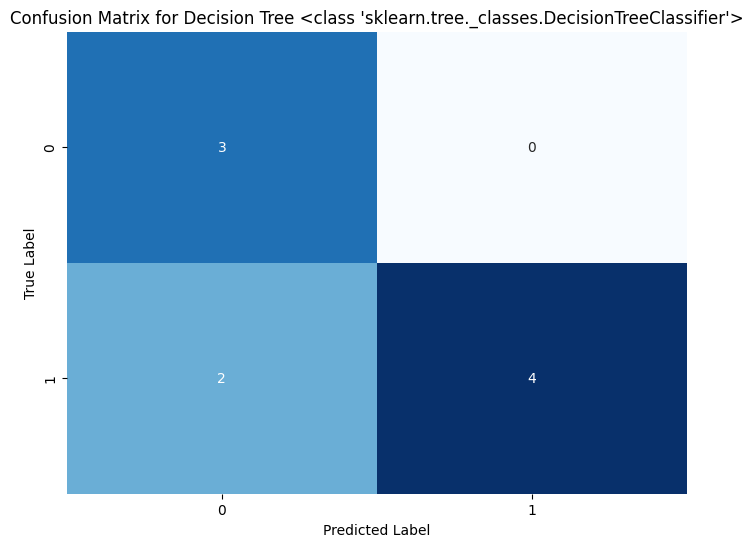

In [ ]:
# DT

from sklearn.tree import DecisionTreeClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml,X_test_ml , y_test_ml,
                       DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_leaf = 5))

Accuracy: 0.8888888888888888
Recall: 0.8888888888888888
Precision: 0.9047619047619047
F1-score: 0.882051282051282
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



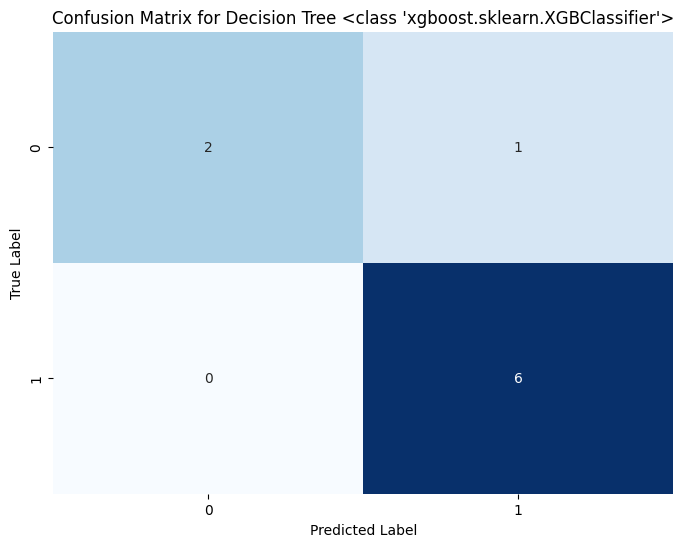

In [ ]:
# XGBoost

from xgboost import XGBClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml,X_test_ml , y_test_ml,
                       XGBClassifier(n_estimators=200, max_depth=9, learning_rate = 0.01))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.7777777777777778
F1-score: 0.7777777777777778
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



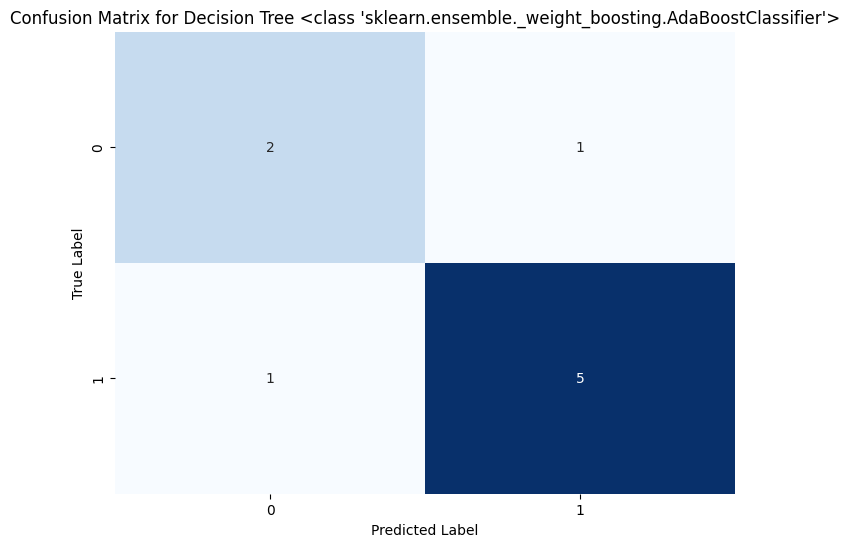

In [ ]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       AdaBoostClassifier(n_estimators=200, learning_rate = 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 20, number of negative: 16
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 36, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555556 -> initscore=0.223144
[LightGBM] [Info] Start training from score 0.223144
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

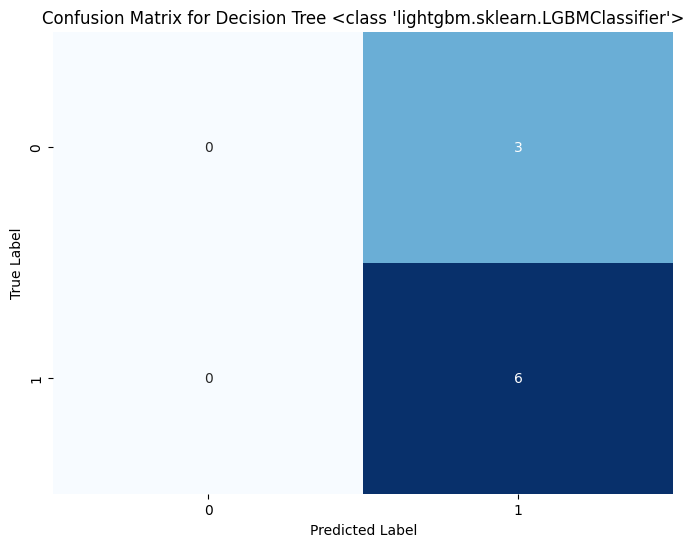

In [ ]:
# LightGBM

from lightgbm import LGBMClassifier
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       LGBMClassifier(learning_rate = 0.01, n_estimators = 200,
                                      max_depth = -1, subsample = 0.8, colsample_bytree = 0.8))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.7777777777777778
F1-score: 0.7777777777777778
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



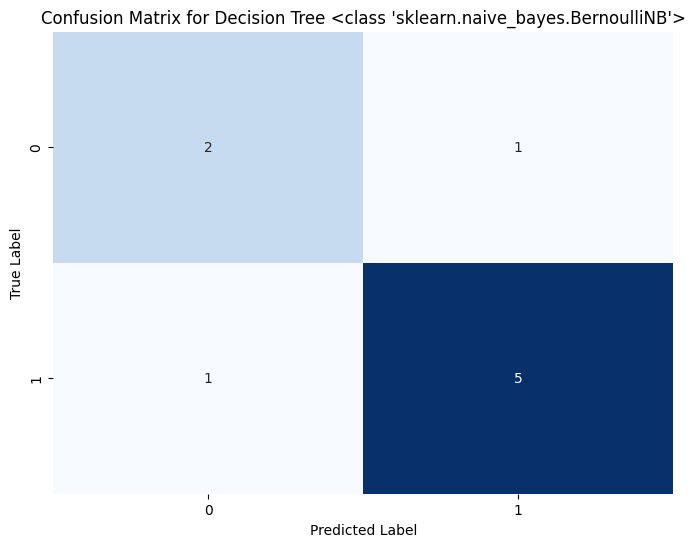

In [ ]:
# Bernoulli NB

from sklearn.naive_bayes import BernoulliNB
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       BernoulliNB(alpha = 0.1, binarize = 0.0, fit_prior = True))

Accuracy: 0.2222222222222222
Recall: 0.2222222222222222
Precision: 0.2777777777777778
F1-score: 0.2222222222222222
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.33      0.17      0.22         6

    accuracy                           0.22         9
   macro avg       0.25      0.25      0.22         9
weighted avg       0.28      0.22      0.22         9



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


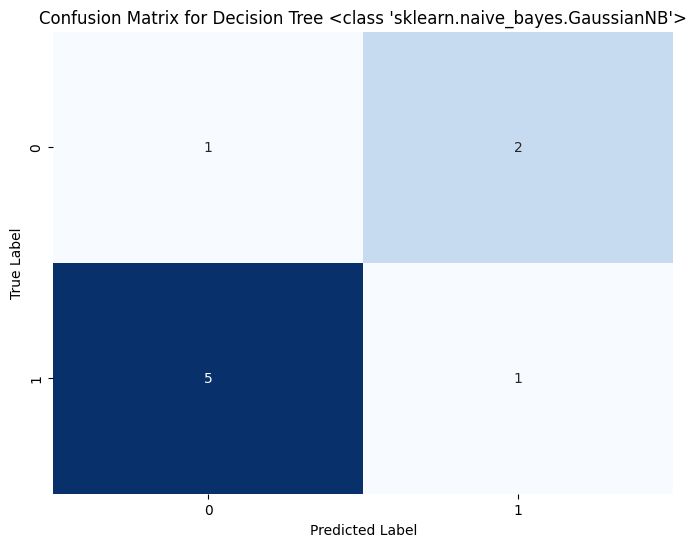

In [ ]:
# Gaussian NB

from sklearn.naive_bayes import GaussianNB
model=fit_and_evaluate(X_train_ml, y_train_ml, X_test_ml, y_test_ml,
                       GaussianNB())

## DL Models

In [121]:
X_train_dl, X_val, y_train_dl, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_dl.shape, X_val.shape, y_train_dl.shape, y_test.shape

((28, 32, 32), (8, 32, 32), (28,), (9,))

In [122]:
scalar = StandardScaler3D()

X_train_dl = scalar.fit_transform(X_train_dl)
X_val = scalar.transform(X_val)
X_test_dl = scalar.transform(X_test)


### CNN

Epoch 1/70
1/1 [==============================] - 7s 7s/step - loss: 0.6857 - accuracy: 0.5357 - val_loss: 0.7208 - val_accuracy: 0.5000
Epoch 2/70
1/1 [==============================] - 0s 125ms/step - loss: 0.5063 - accuracy: 0.8214 - val_loss: 0.8121 - val_accuracy: 0.3750
Epoch 3/70
1/1 [==============================] - 0s 134ms/step - loss: 0.4042 - accuracy: 0.9286 - val_loss: 0.8328 - val_accuracy: 0.3750
Epoch 4/70
1/1 [==============================] - 0s 167ms/step - loss: 0.3042 - accuracy: 1.0000 - val_loss: 0.8050 - val_accuracy: 0.3750
Epoch 5/70
1/1 [==============================] - 0s 148ms/step - loss: 0.2203 - accuracy: 1.0000 - val_loss: 0.7762 - val_accuracy: 0.3750
Epoch 6/70
1/1 [==============================] - 1s 702ms/step
Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.8333333333333334
F1-score: 0.738095238095238
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.33      

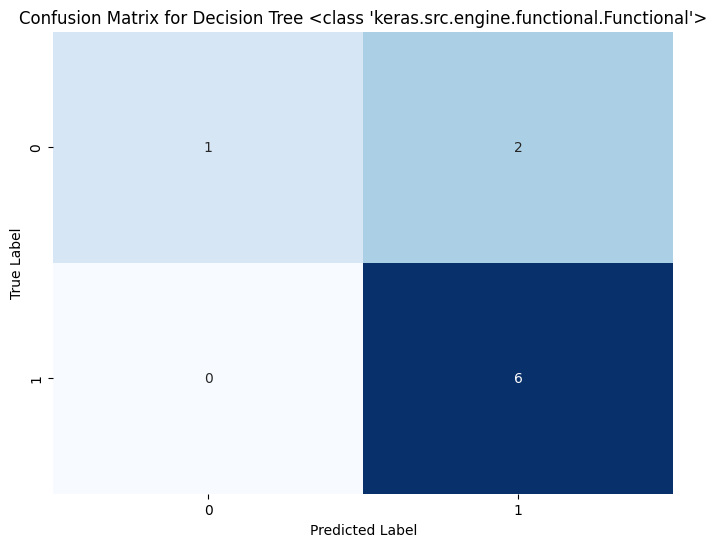

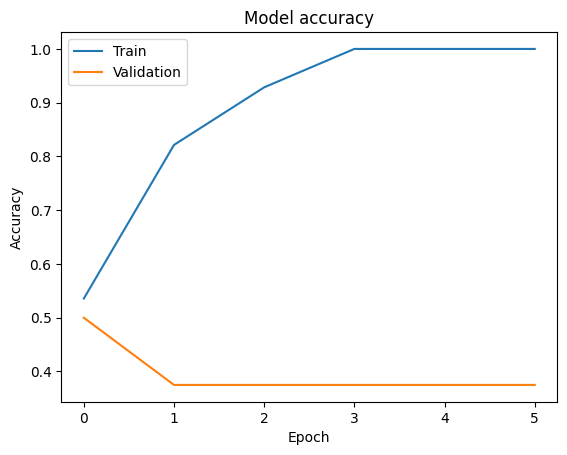

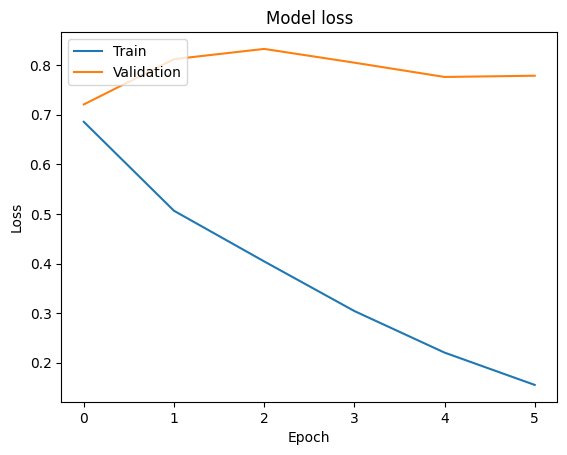

In [125]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping

def block(input):
    conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input)
    conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input)
    conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input)
    x = concatenate([conv1, conv2, conv3], axis=2)
    return x

# Define the input layer with a shape of (32, 32)
input_layer = Input(shape=(32, 32))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

cnn_out1 = Conv1D(32, 3, activation='relu', padding='same')(block3)
cnn_out2 = Conv1D(32, 3, activation='relu', padding='same')(cnn_out1)
cnn_out3 = MaxPooling1D(pool_size=2)(cnn_out2)
cnn_out4 = Flatten()(cnn_out3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(cnn_out4)

# Define the model with 'input_layer' as the input and 'predictions' as the output
model = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = model.fit(X_train_dl, y_train_dl, epochs=70, batch_size=64,
                 validation_data=(X_val, y_val), callbacks=[early_stopping])

# evaluate the model
evaluate(model, X_test_dl, y_test)


# plot model accuracy and loss of training and validation
plot_history(hist)

### LSTM

Epoch 1/30
1/1 [==============================] - 12s 12s/step - loss: 0.6886 - accuracy: 0.5357 - val_loss: 0.7102 - val_accuracy: 0.2500
Epoch 2/30
1/1 [==============================] - 0s 121ms/step - loss: 0.6872 - accuracy: 0.6071 - val_loss: 0.7133 - val_accuracy: 0.2500
Epoch 3/30
1/1 [==============================] - 0s 145ms/step - loss: 0.6803 - accuracy: 0.5000 - val_loss: 0.7172 - val_accuracy: 0.2500
Epoch 4/30
1/1 [==============================] - 0s 147ms/step - loss: 0.6684 - accuracy: 0.6786 - val_loss: 0.7214 - val_accuracy: 0.3750
Epoch 5/30
1/1 [==============================] - 0s 261ms/step - loss: 0.6624 - accuracy: 0.6786 - val_loss: 0.7260 - val_accuracy: 0.3750
Epoch 6/30
1/1 [==============================] - 2s 2s/step
Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.8333333333333334
F1-score: 0.738095238095238
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.33      0

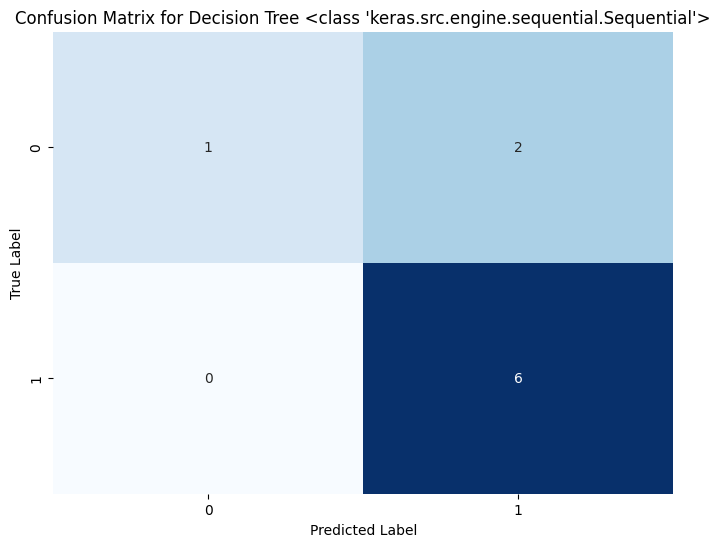

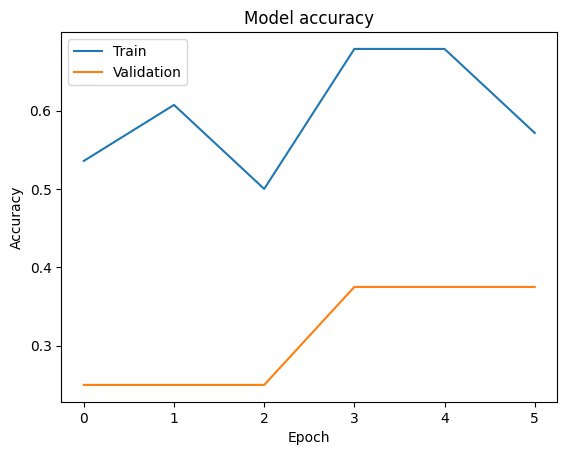

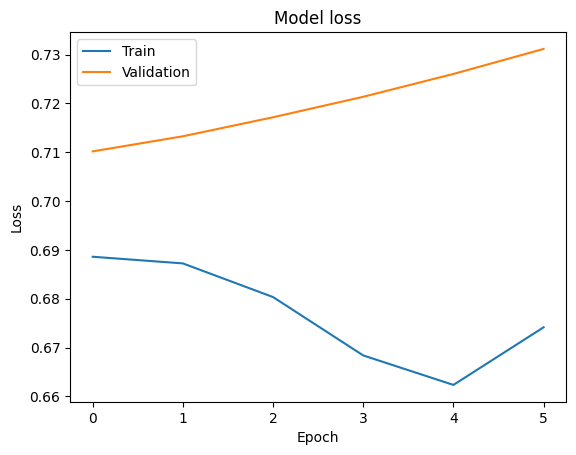

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (32, 32)))
model.add(Dropout(0.2))
model.add(LSTM(units = 25))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(X_train_dl, y_train_dl, epochs=30, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test_dl, y_test)

# Plot the history
plot_history(hist)

### CNN+LSTM

Epoch 1/70
1/1 [==============================] - 7s 7s/step - loss: 0.7000 - accuracy: 0.4286 - val_loss: 0.7260 - val_accuracy: 0.3750
Epoch 2/70
1/1 [==============================] - 0s 102ms/step - loss: 0.6671 - accuracy: 0.6071 - val_loss: 0.7551 - val_accuracy: 0.3750
Epoch 3/70
1/1 [==============================] - 0s 88ms/step - loss: 0.6448 - accuracy: 0.6071 - val_loss: 0.7801 - val_accuracy: 0.3750
Epoch 4/70
1/1 [==============================] - 0s 100ms/step - loss: 0.6274 - accuracy: 0.6071 - val_loss: 0.7958 - val_accuracy: 0.3750
Epoch 5/70
1/1 [==============================] - 0s 99ms/step - loss: 0.6096 - accuracy: 0.6071 - val_loss: 0.8005 - val_accuracy: 0.3750
Epoch 6/70
1/1 [==============================] - 2s 2s/step
Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.8333333333333334
F1-score: 0.738095238095238
Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.33      0.50 

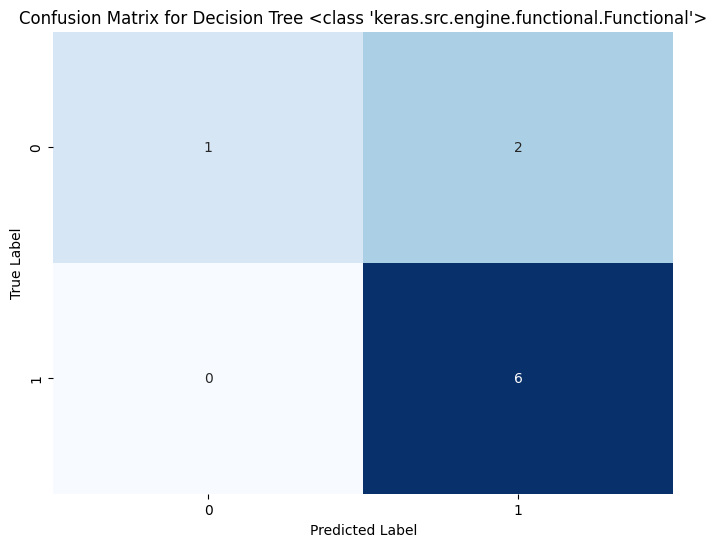

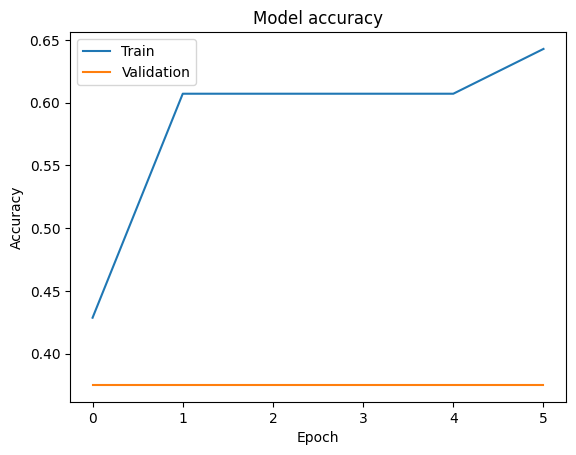

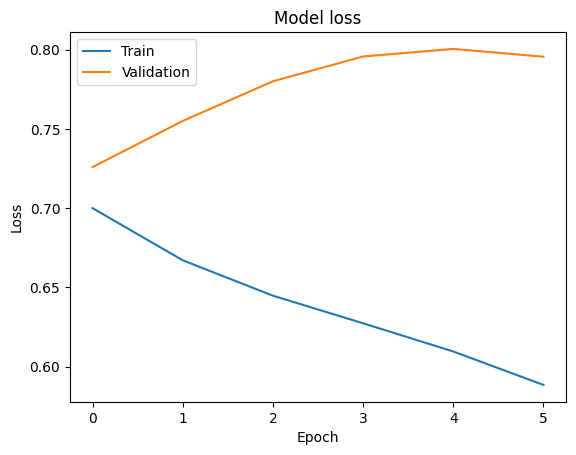

In [135]:
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer with a shape of (32, 32)
input_layer = Input(shape=(32, 32))

# Convolutional Block
conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input_layer)
conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input_layer)
conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input_layer)
cnn_output = concatenate([conv1, conv2, conv3], axis=2)

# LSTM Layer
lstm_layer = LSTM(60)(cnn_output)

# Fully Connected Layers
dense1 = Dense(32, activation='tanh')(lstm_layer)

# Output Layer
predictions = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


hist = model.fit(X_train_dl, y_train_dl, epochs=70,
                 batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test_dl, y_test)

# Plot the history
plot_history(hist)

### CNN+GRU

Epoch 1/70
1/1 [==============================] - 15s 15s/step - loss: 0.6854 - accuracy: 0.6071 - val_loss: 0.7836 - val_accuracy: 0.3750
Epoch 2/70
1/1 [==============================] - 0s 77ms/step - loss: 0.6180 - accuracy: 0.6071 - val_loss: 0.7806 - val_accuracy: 0.3750
Epoch 3/70
1/1 [==============================] - 0s 69ms/step - loss: 0.5557 - accuracy: 0.6071 - val_loss: 0.7430 - val_accuracy: 0.3750
Epoch 4/70
1/1 [==============================] - 0s 84ms/step - loss: 0.4851 - accuracy: 0.7857 - val_loss: 0.7067 - val_accuracy: 0.3750
Epoch 5/70
1/1 [==============================] - 0s 84ms/step - loss: 0.4142 - accuracy: 1.0000 - val_loss: 0.6985 - val_accuracy: 0.3750
Epoch 6/70
1/1 [==============================] - 0s 64ms/step - loss: 0.3376 - accuracy: 1.0000 - val_loss: 0.7257 - val_accuracy: 0.3750
Epoch 7/70
1/1 [==============================] - 0s 78ms/step - loss: 0.2613 - accuracy: 1.0000 - val_loss: 0.7712 - val_accuracy: 0.3750
Epoch 8/70
1/1 [===========

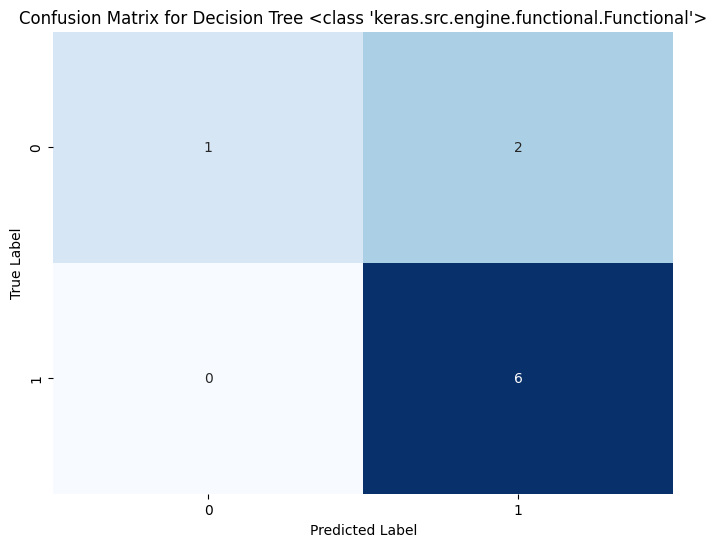

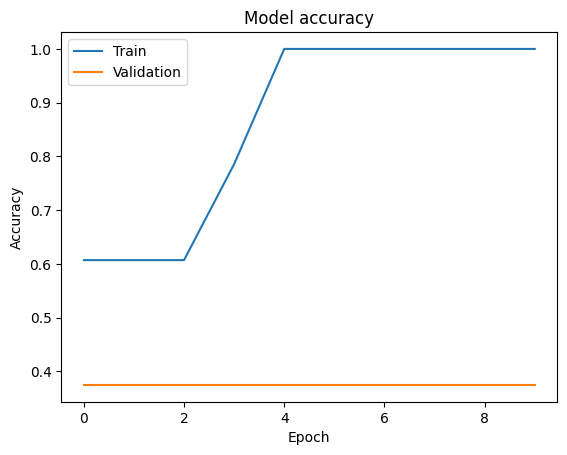

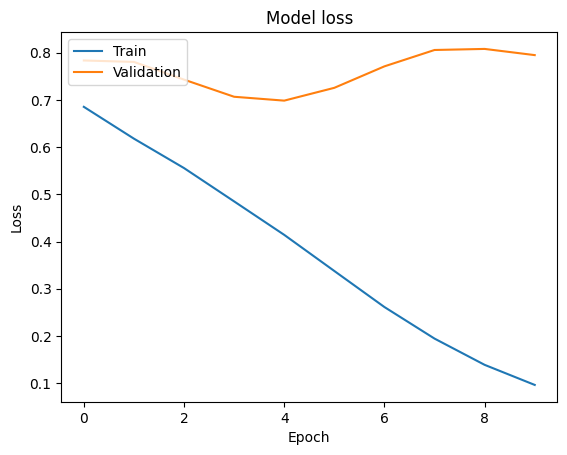

In [147]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#resource:https://github.com/dll-ncai/eeg_pre-diagnostic_screening/blob/master/code/chrononet/chrono.py

def block(input):

  """
    Create a block consisting of three parallel convolutional layers followed by concatenation.

    Parameters:
    - input: Input tensor.

    Returns:
    - Concatenated tensor resulting from the parallel convolutional layers.
    """

  conv1 = Conv1D(32, 2, strides=2,activation='relu',padding="same")(input)
  conv2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(input)
  conv3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(input)
  x = concatenate([conv1,conv2,conv3],axis=2)
  return x

# Define the input layer with a shape of (32, 32)
input = Input(shape=(32, 32))

# Create the first block
block1 = block(input)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

gru_out1 = GRU(32,activation='tanh',return_sequences=True)(block3)
gru_out2 = GRU(32,activation='tanh',return_sequences=True)(gru_out1)
gru_out = concatenate([gru_out1,gru_out2],axis=2)
gru_out3 = GRU(32,activation='tanh',return_sequences=True)(gru_out)
gru_out = concatenate([gru_out1,gru_out2,gru_out3])
gru_out4 = GRU(32,activation='tanh')(gru_out)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(gru_out4)

# Define the model with 'input' as the input and 'predictions' as the output
model = Model(inputs=input, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = model.fit(X_train_dl, y_train_dl, epochs = 70, batch_size = 32,
                 validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test_dl, y_test)

# Plot the history
plot_history(hist)

### RNN

Epoch 1/70
1/1 [==============================] - 6s 6s/step - loss: 0.6635 - accuracy: 0.5357 - val_loss: 0.7521 - val_accuracy: 0.5000
Epoch 2/70
1/1 [==============================] - 0s 201ms/step - loss: 0.4138 - accuracy: 0.8929 - val_loss: 0.7720 - val_accuracy: 0.5000
Epoch 3/70
1/1 [==============================] - 0s 223ms/step - loss: 0.2690 - accuracy: 1.0000 - val_loss: 0.7972 - val_accuracy: 0.5000
Epoch 4/70
1/1 [==============================] - 1s 789ms/step
Accuracy: 0.7777777777777778
Recall: 0.7777777777777778
Precision: 0.8666666666666667
F1-score: 0.7833333333333334
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.67      0.80         6

    accuracy                           0.78         9
   macro avg       0.80      0.83      0.77         9
weighted avg       0.87      0.78      0.78         9



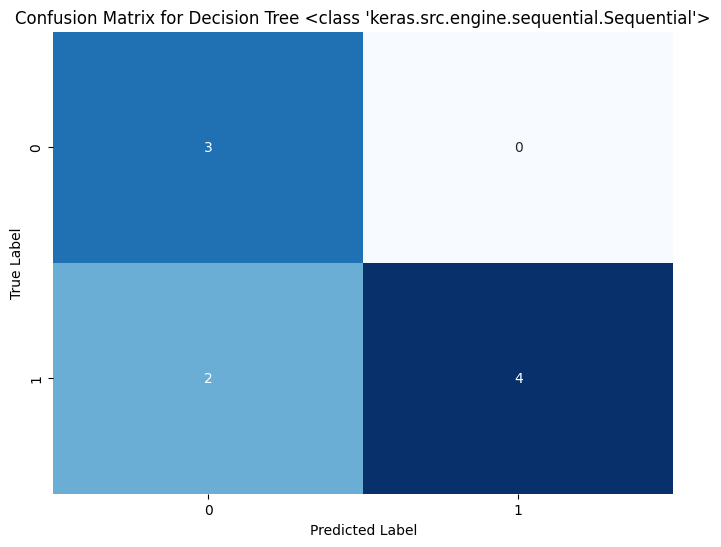

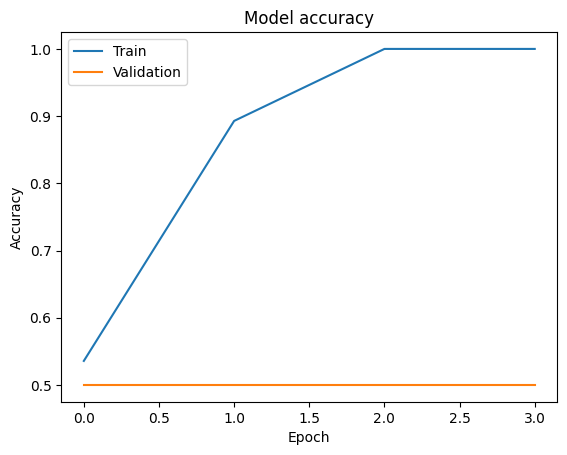

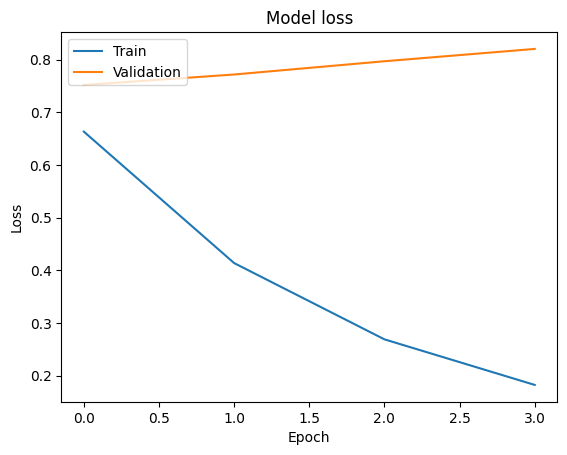

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

input_shape = (32, 32)  # Define input shape as a tuple

def create_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=input_shape, return_sequences=True))  # RNN layer with 128 units and return sequences
    model.add(SimpleRNN(128))  # Additional RNN layer with 128 units
    model.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

    return model

# Pass input shape tuple to the create_model function
model = create_model(input_shape)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

hist = model.fit(X_train_dl, y_train_dl, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
evaluate(model, X_test_dl, y_test)

# Plot the history
plot_history(hist)